In [7]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('bmh')
import seaborn as sns
import os

In [8]:
df_titanic = sns.load_dataset("titanic")
df_titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


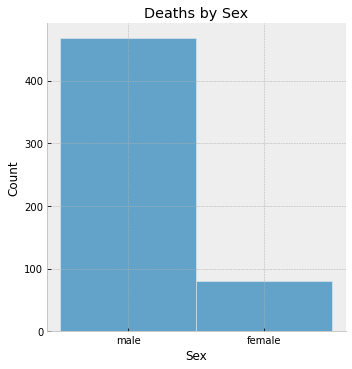

<Figure size 432x288 with 0 Axes>

In [9]:
df_titanic_deaths=df_titanic[df_titanic.alive=='no']
#df_titanic_deaths_by_class=df_titanic_deaths.groupby('sex').pclass.count()
ax = sns.displot(data=df_titanic_deaths, x='sex', fill=True)
ax.set(xlabel='Sex', ylabel='Count', title='Deaths by Sex')
plt.figure();



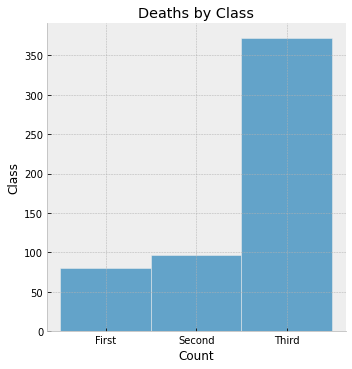

<Figure size 432x288 with 0 Axes>

In [10]:
ax = sns.displot(data=df_titanic_deaths, x='class', fill=True)
ax.set(xlabel='Count', ylabel='Class', title='Deaths by Class')
plt.figure();

In [11]:
df_titanic_deaths_by_class=df_titanic_deaths[['sex', 'class']]
df_titanic_deaths_by_class.head(200)



,sex,class
0,male,Third
4,male,Third
5,male,Third
6,male,First
7,male,Third
...,...,...
312,female,Second
313,male,Third
314,male,Second
317,male,Second


In [12]:
##df.groupby("state")["last_name"].count()
#df.groupby(["state", "gender"])["last_name"].count()
df_titanic_deaths_by_class=df_titanic_deaths_by_class.groupby(['sex','class']).size().reset_index(name="Count")
df_titanic_deaths_by_class.head(100)

#ax = sns.displot(data=df_titanic_deaths_by_class, x='class', fill=True)
#plt.figure();#
#grouped_df = data.groupby(['Gender', 'Employed']
 #                         ).size().reset_index(name="Count")

,sex,class,Count
0,female,First,3
1,female,Second,6
2,female,Third,72
3,male,First,77
4,male,Second,91
5,male,Third,300


Text(0.5, 0.98, 'Titanic Deaths Count By Class and Gender')

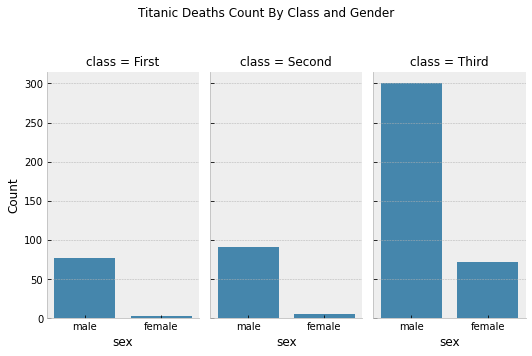

In [13]:
g = sns.FacetGrid(df_titanic_deaths_by_class, col="class", height=5, aspect=.5)
g.map(sns.barplot, "sex", "Count", order=["male", "female"])
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Titanic Deaths Count By Class and Gender')